In [89]:
# Install nessasary librarys
!pip install scikit-learn
!pip install matplotlib


In [90]:
# Import the relevant librarys
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sklearn
import kaggle

# Import zipfile library (we will use this to extract the file downloaded from Kaggle)
import zipfile


In [91]:
# Download dataset from kaggle using the Kaggle API
!kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python


Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)


In [92]:
# Extract the file from the downloaded zip file
zipfile_name = "customer-segmentation-tutorial-in-python.zip"
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [93]:
# Full path to the CSV file
file_path = r"Mall_Customers.csv"

# Load the data into a pandas DataFrame
customer_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data
print(customer_data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [94]:
# Number of rows and colums
customer_data.shape

(200, 5)

In [95]:
# See how our data looks
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [96]:
# Checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [97]:
# Calculate the mean and standard deviation for Age and Annual Income columns in the non-standardised dataset
mean_age_original = customer_data['Age'].mean()
std_age_original = customer_data['Age'].std()

mean_income_original = customer_data['Annual Income (k$)'].mean()
std_income_original = customer_data['Annual Income (k$)'].std()

print('Mean Age:', mean_age_original)
print('Standard Deviation of Age:', std_age_original)
print('Mean Annual Income (k$):', mean_income_original)
print('Standard Deviation of Annual Income (k$):' ,std_income_original)


Mean Age: 38.85
Standard Deviation of Age: 13.96900733155888
Mean Annual Income (k$): 60.56
Standard Deviation of Annual Income (k$): 26.264721165271244


In [98]:
mean_age = 38.8
std_age = 13.97
mean_income = 60.56  # in thousands
std_income = 26.26  # in thousands

customer_data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


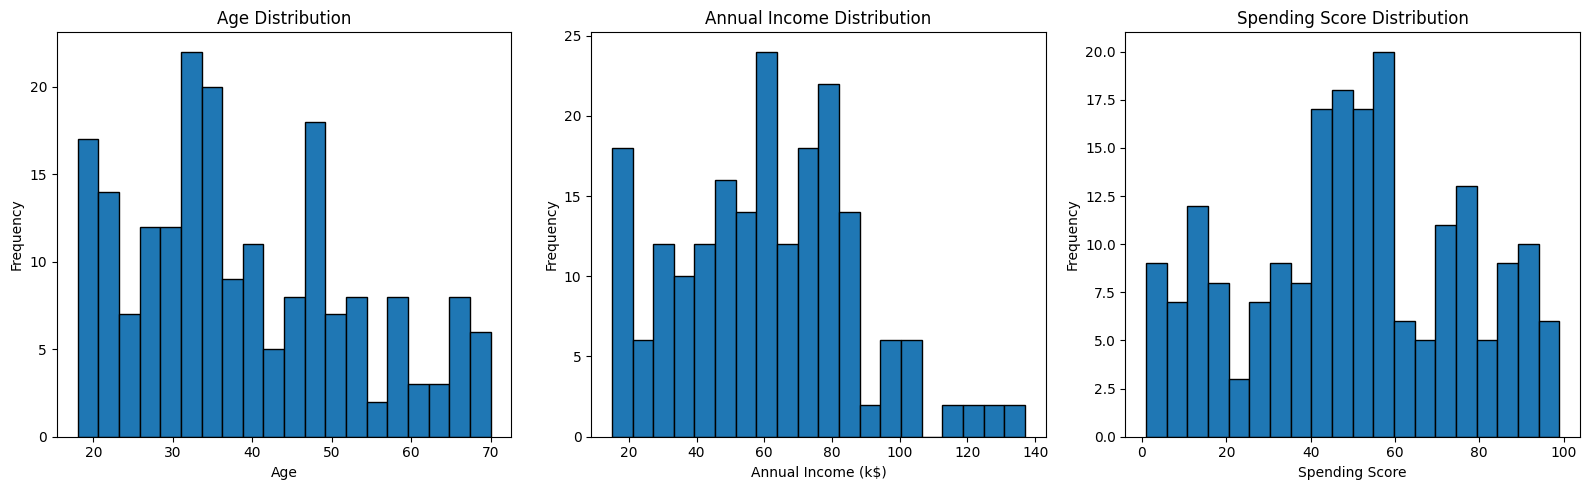

In [99]:
import matplotlib.pyplot as plt

# Plotting the distribution of Age, Annual Income, and Spending Score
plt.figure(figsize=(16, 5))

# Age distribution
plt.subplot(1, 3, 1)
plt.hist(customer_data['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Annual Income distribution
plt.subplot(1, 3, 2)
plt.hist(customer_data['Annual Income (k$)'], bins=20, edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

# Spending Score distribution
plt.subplot(1, 3, 3)
plt.hist(customer_data['Spending Score (1-100)'], bins=20, edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [100]:
# Selecting the numerical features to scale
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler and transform the selected features
customer_data_scaled = customer_data.copy()
customer_data_scaled[features_to_scale] = scaler.fit_transform(customer_data[features_to_scale])

# Show the first few rows of the scaled data
print(customer_data_scaled.head())


   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male -1.424569           -1.738999               -0.434801
1           2    Male -1.281035           -1.738999                1.195704
2           3  Female -1.352802           -1.700830               -1.715913
3           4  Female -1.137502           -1.700830                1.040418
4           5  Female -0.563369           -1.662660               -0.395980


In [101]:
# Drop CustomerID since it's not relevant for clustering
customer_data_scaled = customer_data_scaled.drop('CustomerID', axis=1)

# Convert Gender to numerical values (optional, if you want to include it)
customer_data_scaled['Gender'] = customer_data_scaled['Gender'].map({'Male': 0, 'Female': 1})

# Display the first few rows to verify changes
print(customer_data_scaled.head())


   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0       0 -1.424569           -1.738999               -0.434801
1       0 -1.281035           -1.738999                1.195704
2       1 -1.352802           -1.700830               -1.715913
3       1 -1.137502           -1.700830                1.040418
4       1 -0.563369           -1.662660               -0.395980


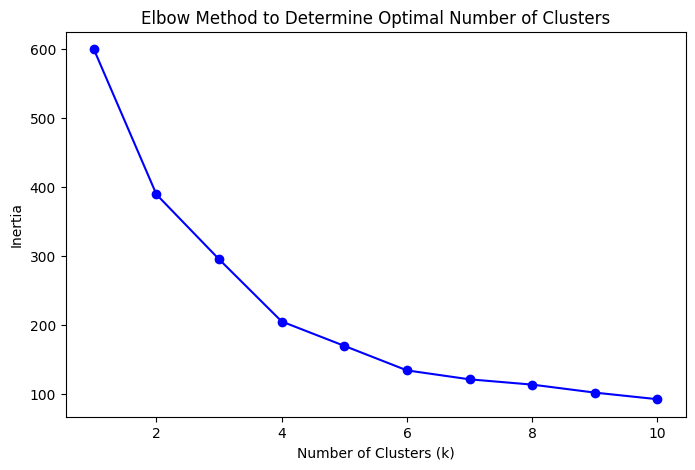

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Select the relevant features for clustering (Age, Annual Income, Spending Score)
features = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Use the Elbow method to find the optimal number of clusters
inertia = []
k_values = range(1, 11)  # Testing for 1 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method result
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [103]:
# Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the resulting clusters by looking at the mean of each numeric feature within each cluster
numeric_columns = customer_data.select_dtypes(include=['number']).columns  # Only select numeric columns
cluster_summary = customer_data.groupby('Cluster')[numeric_columns].mean()

# Print the cluster summary
print(cluster_summary)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         68.775862  55.275862           47.620690               41.706897   
1        161.025000  32.875000           86.100000               81.525000   
2         23.461538  25.769231           26.115385               74.846154   
3         86.377778  26.733333           54.311111               40.911111   
4        166.870968  44.387097           89.774194               18.483871   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  
4            4.0  


In [105]:
# Based on the cluster characteristics, I have the following insights:
# Cluster 0: Older customers (average age ~55) with mid-level income and average spending.
# Cluster 1: Younger to mid-aged customers (average age ~32) with high income and high spending scores. Likely premium spenders.
# Cluster 2: Young customers (average age ~25) with lower income but relatively higher spending scores.
# Cluster 3: Older customers (average age ~46) with low income and low spending scores.
# Cluster 4: Mid-aged customers (average age ~39) with high income but low spending scores.

# Actionable insights:
# Cluster 1 (high income, high spenders) could be targeted with premium products, exclusive offers, and loyalty programs.
# Cluster 4 (high income, low spenders) might respond well to personalized promotions or discounts to increase engagement.
# Cluster 3 (low income, low spenders) could benefit from budget-friendly offers or products to better suit their spending capacity.

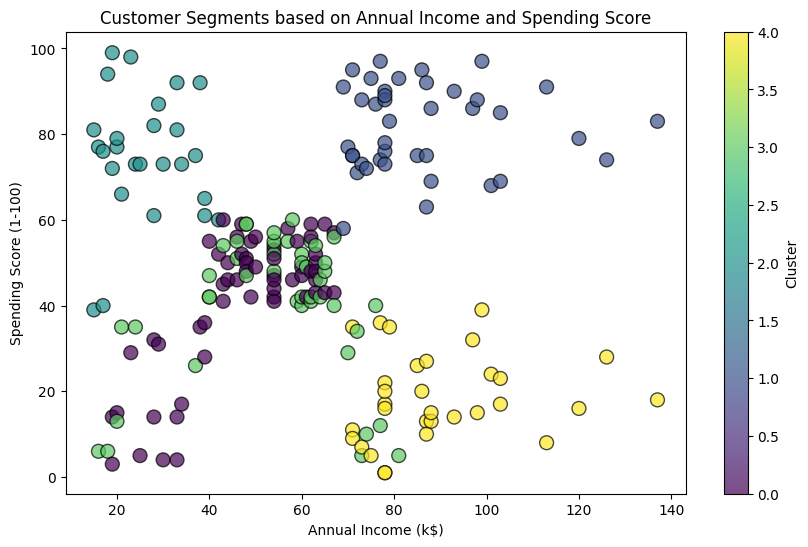

In [110]:
# Plotting the clusters based on Annual Income and Spending Score

plt.figure(figsize=(10, 6))

# Scatter plot of clusters
plt.scatter(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'], 
            c=customer_data['Cluster'], cmap='viridis', s=100, alpha=0.7, edgecolor='k')

# Adding labels and title
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')

plt.show()


<Figure size 1000x600 with 0 Axes>

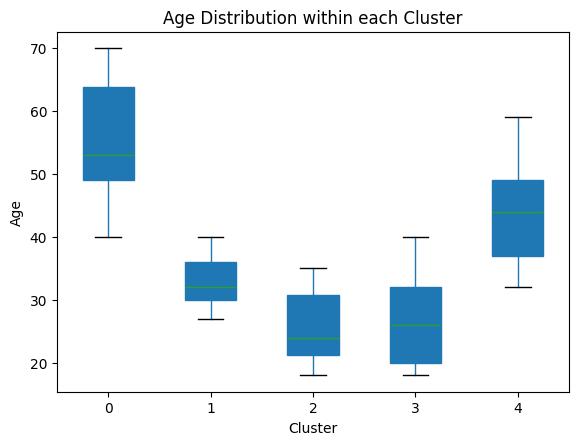

In [113]:
# Plot the distribution of Age within each cluster using a boxplot

plt.figure(figsize=(10, 6))

# Create a boxplot for Age distribution within each cluster
customer_data.boxplot(column='Age', by='Cluster', grid=False, patch_artist=True)

# Adding labels and title
plt.title('Age Distribution within each Cluster')
plt.suptitle('')  # Removes the automatic title
plt.xlabel('Cluster')
plt.ylabel('Age')

plt.show()


In [ ]:
# Cluster 0 has a higher median age, indicating that older customers are more prevalent in this group.
# Cluster 2 primarily consists of younger customers, with the median age in the mid-20s.
# Cluster 3 also has older customers, similar to Cluster 0, but there may be other factors (like low income and spending) that differentiate them.
# Cluster 1 shows a wider age range but generally skews younger, as this cluster includes high-income, high-spending customers.
# Cluster 4 has a middle age range, with a median around 40 years.

# Age is an important factor in differentiating spending behavior. 
# Younger customers (Cluster 2) tend to have moderate income but relatively higher spending.
# Older customers (Cluster 3) might be more conservative in spending.

In [108]:
# Export the data to a CSV file for dashboard creation in Tableau
customer_data.to_csv('customer_segments_output.csv', index=False)

